In [92]:
%matplotlib notebook
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

filename = 'wcoa_cruise/WCOA2013_hy1.csv'      #opening the data through pandas
df = pd.read_csv(filename, header=31, 
                 na_values=-999, parse_dates=[[8,9]])

In [93]:
ii,= np.where(df['CTDPRS']>500)   #making it read data that is greater than 500 dbars

<IPython.core.display.Javascript object>


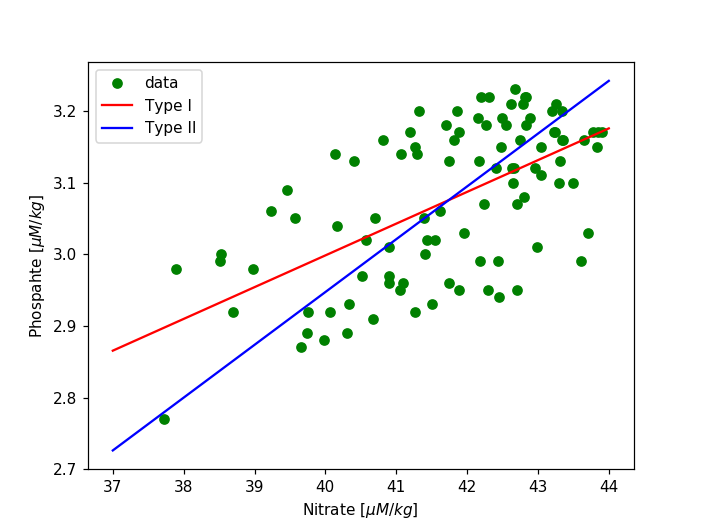

Text(0,0.5,'Phospahte $[\\mu M/kg]$')

In [94]:
plt.figure()
plt.plot(df['NITRAT'][ii], df['PHSPHT'][ii],'go',label='data')    #plotting a figure with nitrate on x-axis and phospahte on y-axis


plt.xlabel('Nitrate $[\mu M/kg]$')      #labeling the x and y axis
plt.ylabel('Phospahte $[\mu M/kg]$')

In [95]:
x = df['NITRAT'][ii]
y = df['PHSPHT'][ii]


i=(np.isfinite(x) & np.isfinite(y))   #telling it to only give values that have a number value instead of nan
result = stats.linregress(x[i],y[i])   #calculating the linear regression slope and y-intercept
print(result)

LinregressResult(slope=0.044318374817489251, intercept=1.2256295832176192, rvalue=0.60139317146466897, pvalue=5.8218509182965326e-11, stderr=0.0060091226782144017)


In [96]:
print(result[0])  #checking results 
print(result[1])


0.0443183748175
1.22562958322


In [97]:
x1=37       #x-data values for x
x2=44            #minimum and maximum of data


y1=(result[0]*x1)+result[1]   #slope equation
y2=(result[0]*x2)+result[1]        #y=slope*x+intercept
                                  #plug in x for y

plt.plot((x1,x2),(y1,y2),'r-',label='Type I')   #plotting line wih results from above
    
#ii,= np.where(df['CTDPRS']>500)   #data where pressure is greater than 500dbar
#plt.figure()
#plt.plot(df['NITRAT'][ii], df['PHSPHT'][ii],'go')  #ploting data with ii




#plt.xlabel('Nitrate')       #x and y axis labels
#plt.ylabel('Phospahte')







In [98]:
def type2regress(x,y):
    '''This function calculates the slope and y-intercept of the geometric mean (Type II) regression line, given two arrays''' 
    #Type II Linear regression.
    #INPUTS:
    #x,y - two different variables
    #OUTPUT:
    #slope, intercept
    
    result_yx = stats.linregress(x,y)  #linregress of y from x
    myx=result_yx[0]       #slope of y from x
         
    
    result_xy=stats.linregress(y,x)  #linregress of x from y
    mxy=result_xy[0]       #slope of x from y
     
    slope=np.sqrt(myx/mxy)  #calculating the geometric mean (new slope of type 2)
    
    intercept=np.mean(y)-(slope*np.mean(x))
   
    

    # Insert code here.

    return slope,intercept
    
    
    
    
ii,= np.where(df['CTDPRS']>500)

x=df['NITRAT'][ii]
x=np.array(x)
x=x[np.isfinite(x)]
#print(x)

y=df['PHSPHT'][ii]
y=np.array(y)
y=y[np.isfinite(y)]
#print(y)
x_total=len(x)
y_total=len(y)
n=(x_total*y_total)
nu=n-1  

slope,intercept=type2regress(x,y)
print('slope of type two regression')
print(slope)
print('intercept of type two regression')
print(intercept)
    

slope of type two regression
0.0736928467438
intercept of type two regression
-0.000481856750557


In [99]:
x1=37       #x-data values for x
x2=44            #minimum and maximum of data

y1=(slope*x1)+intercept   #slope equation
y2=(slope*x2)+intercept       #y=slope*x+intercept
                                  #plug in x for y   using new type 2 data
    
plt.plot((x1,x2),(y1,y2),'b-', label='Type II')   #plotting new slope and intercept of type 2 data
    
plt.legend()    #adding legend to show which line corresponds to the different types

#part 5 questions

1) the strength and significance of the correlation in #1
    The data as graphed in part one looks like it is trending in an upward positive slope. When comparing the r-critical calculated in part 3 we get a value of 0.601. This value was compared to the Correlation coefficient table to see if there was a significance in the r value we calculated. The degrees of freedom were 96 and the level of significance was 0.05 so the expected value should have been around 0.2. The r value was larger showing that the data was siginificantly correlated. 


2) the applicability of a Type I or Type II linear regression model
    Type I is assumes one data set is dependent on the other data set. In this case it is assuming that y is dependent on x. In a type II case, it does not assume one set of data is dependent on another, it instead assumes they are both independent of each other. In this case nitrate is independent from phosphate and phosphate is also independent of nitrate (they do not rely on one another). In this case of nitrate and phosphate a type II regression is better fit. If one of the data sets was time or pressure, then the other data set would be dependent on the other. In that case a type I regression would be the way to go. 
    


3) your oceanographic interpretation
    Nitrate and phosphate both depend on different things that control their concentration in the ocean. Depth, productivity, and runoff from anthropogenic sources. In this case nitrate and phosphate are independent of each other, but may depend on other factors, like the ones listed above. This is why the correlation coefficient was not 1.  

